In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm
from PIL import Image
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks

Q1

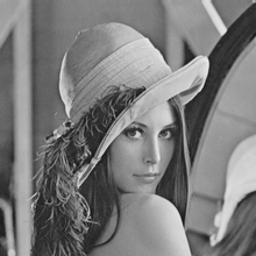

In [31]:
# Load the original RGB image
rgb_image = Image.open('Lenna.jpg')
# Implement the NTSC formula
rgb_array = np.array(rgb_image)
gray_array = np.dot(rgb_array[...,:3], [0.2989, 0.5870, 0.1140])
gray_array = gray_array.astype(np.uint8)
Image.fromarray(gray_array).save('LennaGray.jpg')
gray_image = Image.open('LennaGray.jpg')
display(gray_image)

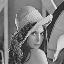

In [32]:
# Down sample the image to 64*64
image = Image.open("LennaGray.jpg")
img_array = np.array(image)
decimation_factor = 4
output_size = img_array.shape[0]//decimation_factor, img_array.shape[1]//decimation_factor
downsample_array = np.zeros(output_size, dtype=np.uint8)
# Decimate the 4th pixel of the origin image in each row and column
for i in range(output_size[0]):
    for j in range(output_size[1]):
        downsample_array[i, j] = img_array[i*decimation_factor, j*decimation_factor]
Image.fromarray(downsample_array).save('LennaGray_downsample.jpg')
resized_image = Image.open('LennaGray_downsample.jpg')
display(resized_image)

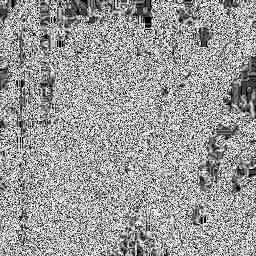

In [42]:
img = Image.open('LennaGray.jpg')
# Build a Sobel kernel
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Implement a 2D convolution function
def conv(image, kernel):
    output = np.zeros_like(image)
    kernel_size = kernel.shape[0]
    padding = kernel_size//2
    img_padded = np.pad(image, padding, mode='edge')
    for i in range(padding, image.shape[0] + padding):
        for j in range(padding, image.shape[1] + padding):
            output[i-padding, j-padding] = np.sum(img_padded[i-padding:i+padding+1, j-padding:j+padding+1] * kernel)
    return output

img_array = np.array(img)
img_x = conv(img_array, sobel_x)
img_y = conv(img_array, sobel_y)
# Calculate the gradient magnitude
grad_mag = np.sqrt(np.square(img_x) + np.square(img_y))
# Normalize the gradient magnitude to 0-255 range
gradient_mag = (grad_mag - np.min(grad_mag)) * 255/ (np.max(grad_mag) - np.min(grad_mag))
Image.fromarray(gradient_mag.astype(np.uint8)).save('Lenna_edge.jpg')
img_edge = Image.open('Lenna_edge.jpg')
display(img_edge)

Q2

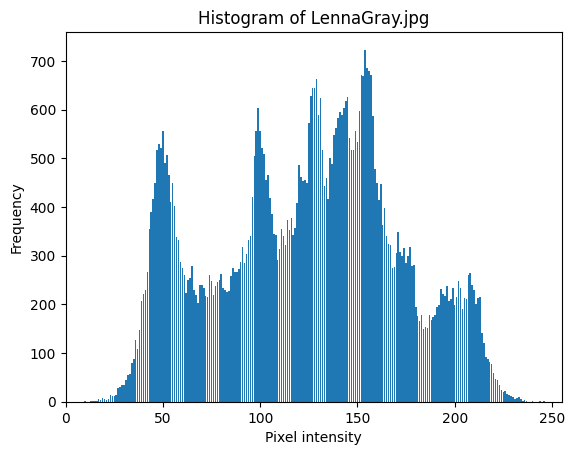

In [57]:
img = np.array(Image.open('LennaGray.jpg'))
# Calculate the histogram of the image
hist = np.zeros(img.shape[0], dtype=int)
for i in range(len(img[0])):
    for j in range(len(img[1])):
        hist[img[i, j]] += 1
bins = np.arange(img.shape[0])
# Visualize the histogram
plt.bar(bins, hist)
plt.xlim(min(bins), max(bins))
plt.title('Histogram of LennaGray.jpg')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.show()

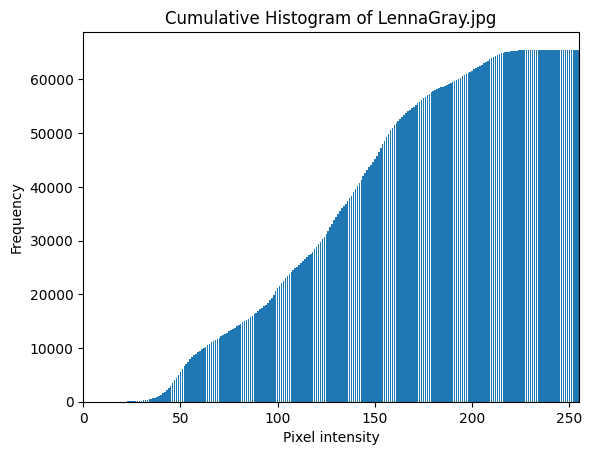

In [56]:
img = np.array(Image.open('LennaGray.jpg'))
# Calculate the histogram of the image
hist = np.zeros(img.shape[0], dtype=int)
for i in range(len(img[0])):
    for j in range(len(img[1])):
        hist[img[i, j]] += 1
# Calculate the cumulative histogram of the image
cum_hist = np.zeros(len(hist), dtype=int)
for i in range(len(hist)):
    cum_hist[i] = hist[i] + cum_hist[i-1]
bins = np.arange(img.shape[0])
# Visualize the histogram
plt.bar(bins, cum_hist)
plt.xlim(min(bins), max(bins))
plt.title('Cumulative Histogram of LennaGray.jpg')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.show()

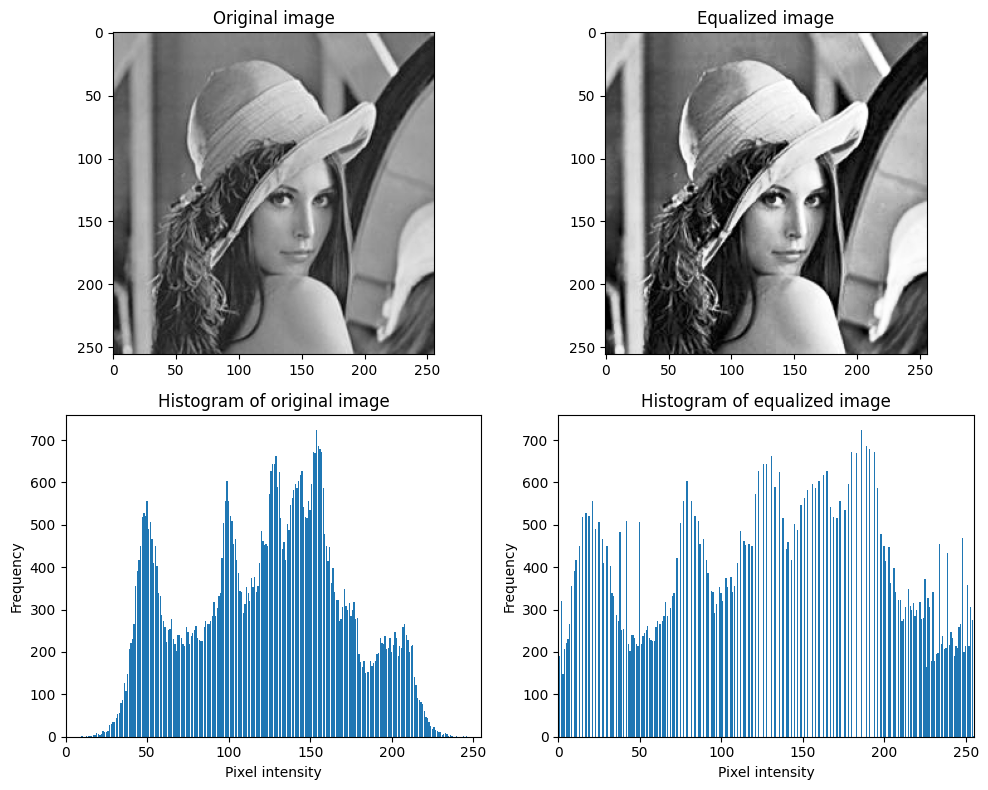

In [61]:
img = np.array(Image.open('LennaGray.jpg'))
def histogram_para(image):
    # Calculate the histogram of the image
    hist = np.zeros(image.shape[0], dtype=int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i, j]] += 1
    # Calculate the cumulative histogram of the image
    cum_hist = np.zeros(len(hist), dtype=int)
    for i in range(len(hist)):
        cum_hist[i] = hist[i] + cum_hist[i-1]
    return hist, cum_hist
histogram, cum_histogram = histogram_para(img)
# Transfer cumulative histogram from origin to 0-255
cum_hist_normalized = (cum_histogram * 255) // cum_histogram[-1]
img_eq = np.zeros_like(img, dtype=int)
# Implement the histogram equalization for the image
for i in range(img.shape[0]):
    img_eq[i] = cum_hist_normalized[img[i]]
# Get the equalized image histogram and cumulative histogram
hist_eq, cum_hist_eq = histogram_para(img_eq)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
bins_eq = np.arange(img_eq.shape[0])
bins = np.arange(img.shape[0])
# Original image and its histogram
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original image')
axs[1, 0].bar(bins, histogram)
axs[1, 0].set_xlim(min(bins), max(bins))
axs[1, 0].set_title('Histogram of original image')
axs[1, 0].set_xlabel('Pixel intensity')
axs[1, 0].set_ylabel('Frequency')
# Equalized image and its histogram
axs[0, 1].imshow(img_eq, cmap='gray')
axs[0, 1].set_title('Equalized image')
axs[1, 1].bar(bins_eq, hist_eq)
axs[1, 1].set_xlim(min(bins_eq), max(bins_eq))
axs[1, 1].set_title('Histogram of equalized image')
axs[1, 1].set_xlabel('Pixel intensity')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Q3-1 Apply and visualize histogram analysis, then find a proper threshold to convert the image to a binary image. (2 pts)

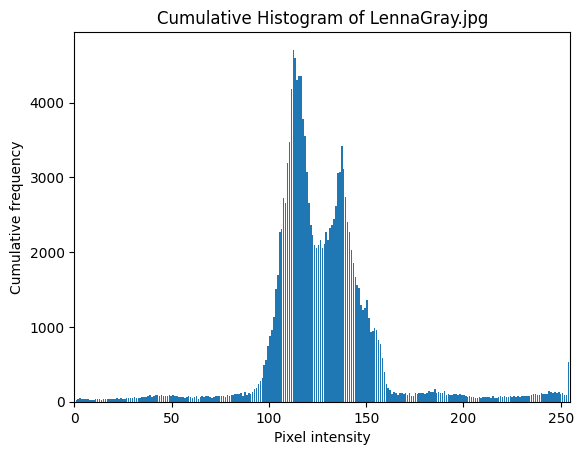

The threshold is: 167.0


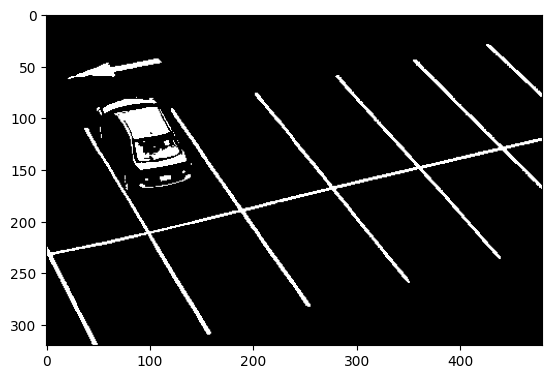

In [4]:
img = np.array(Image.open('ParkingLot.jpg'))
hist, bins = np.histogram(img.flatten(), bins=256, range=(0, 255))
plt.bar(bins[:-1], hist)
plt.xlim(min(bins), max(bins))
plt.title('Cumulative Histogram of LennaGray.jpg')
plt.xlabel('Pixel intensity')
plt.ylabel('Cumulative frequency')
plt.show()
# Apply thresholding
ret, threshold = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Visualize thresholded image
print('The threshold is:', ret)
plt.imshow(threshold, cmap='gray')
plt.savefig('Parkingbinary.jpg')
plt.show()

3-2) Apply Hough transformation or other line detection approach to detect multiple lines in the image (You select a threshold for the voting matrix). Visualize the lines in the image space (just as: we saw lines there) and in the transformed space (like in Polar space that we introduced in the class) respectively. (5 pts)

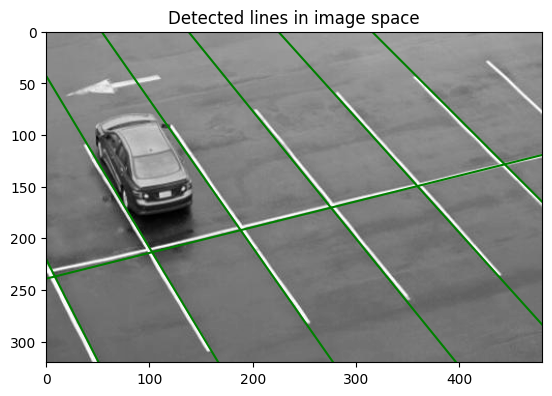

(-90.5, 89.5, 577.5, -577.5)

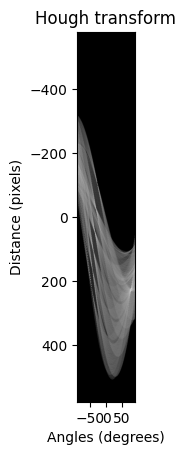

In [57]:
img = np.array(Image.open('ParkingLot.jpg'))
# Implement Canny algorithm to get the binary edge
edges = canny(img, sigma=2, low_threshold=85, high_threshold=150)
h, theta, d = hough_line(edges)
# Find the peaks in the Hough accumulator matrix
peaks = hough_line_peaks(h, theta, d, threshold=85)
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
for _, angle, dist in zip(*peaks):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - img.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.add_line(Line2D([0, img.shape[1]], [y0, y1], color='green'))
ax.set_xlim((0, img.shape[1]))
ax.set_ylim((img.shape[0], 0))
ax.set_title('Detected lines in image space')
plt.show()
# Visualize the transformed space
angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
plt.imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect='auto')
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.axis('image')

3-4) Design and implement the approaches to find all parking space polygons with the four vertex points for each parking space. Describe your approaches and visualize all detected polygons with different colors overlaid on the original image. The TA will check your code. (20 pts)

In [61]:
import cv2
import numpy as np

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import cm
from PIL import Image
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line

img = np.array(Image.open('ParkingLot.jpg'))
# Implement Canny algorithm to get the binary edge
edges = canny(img, sigma=2, low_threshold=85, high_threshold=150)
identified_lines = np.array(probabilistic_hough_line(edges))
identified_lines = np.squeeze(identified_lines)
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
for x0, x1, y0, y1 in zip(identified_lines):
    ax.add_line(Line2D([0, img.shape[1]], [y0, y1], color='green'))
ax.set_xlim((0, img.shape[1]))
ax.set_ylim((img.shape[0], 0))
ax.set_title('Detected lines in image space')
plt.show()